In [63]:
import numpy as np
t = np.load(r"W:\mfm\MFM_Synthsizer\data\violin\sustain\table\55.npz",allow_pickle=False)

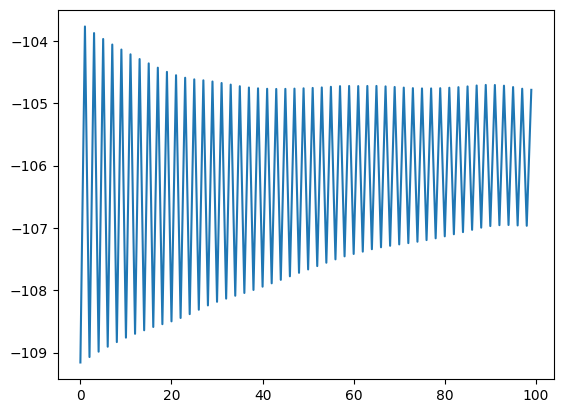

In [64]:
from matplotlib import pyplot as plt


plt.plot(t['alphaGlobal'][0][50:150])


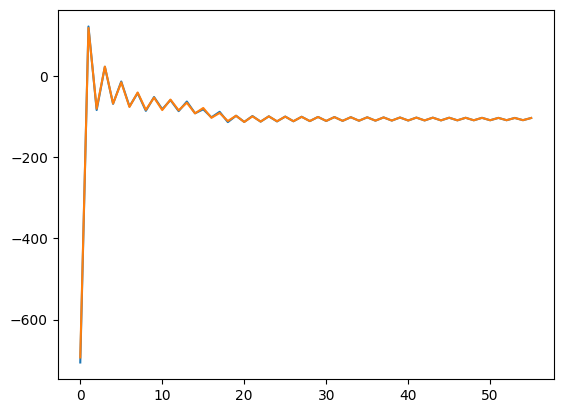

In [77]:
from matplotlib import pyplot as plt
from scipy.signal import resample

def resample_test(y, original_sr, target_sr):
    return resample(y, int(y.shape[0] * target_sr / original_sr))
    
start = 25000
end = 50000 
# plt.plot(resample_test(np.load('alpha.npy')[25000:50000],44100,100))
# plt.plot(resample_test(np.load('alphag.npy')[25000:50000],44100,100))

In [ ]:

plt.plot(resample_test(np.load('alpha.npy'),44100,100)[start//441:end//441])
plt.plot(resample_test(np.load('alphag.npy'),44100,100)[start//441:end//441])

In [775]:
from pathlib import Path
import soundfile as sf
from matplotlib import pyplot as plt
import librosa
import numpy as np

from data_proc.split import detect_onsets

audio, sr = librosa.load(r'.\data\151VNNVM.WAV')
onsets = detect_onsets(audio,n_fft=64,visualize=True)

segments = np.split(audio,onsets)[1:]

# trim end of segments
segments = [s[:-4000] for s in segments]

# save segments
Path('./data/audio').mkdir(parents=True,exist_ok=True)
for i,s in enumerate(segments[0:13] + segments[19:26] + segments[32:39] + segments[45:]):
    sf.write(f'./data/audio/{55+i}.wav',s,sr)

In [513]:
np.argmin([len(s) for s in segments])

56

In [782]:
pitch = 55
base_freq = 440 * np.power(2, (pitch-69)/12)
print(base_freq)

195.99771799087463


In [776]:
np.savez('./data/table.npz',a={'a1':np.array([1,2,3])})


In [780]:
np.load('./data/table.npz',allow_pickle=True)['a']

array({'a1': array([1, 2, 3])}, dtype=object)

In [546]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

freq_to_midi(439)

69

67

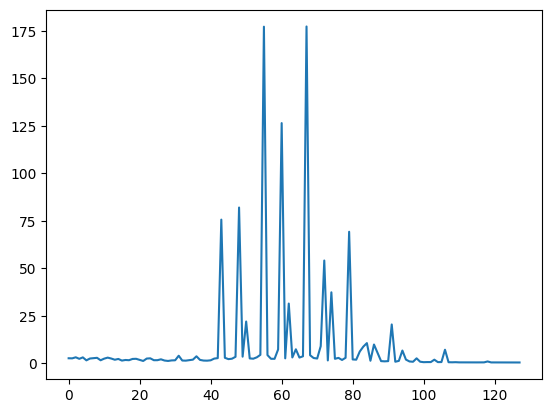

In [756]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

def midi_to_freq(midi):
    return 440 * 2 ** ((midi - 69) / 12)

def get_first_peak(seq):
    m = np.max(seq)
    for i,s in enumerate(seq):
        if i < 3 or i == len(seq)-1:
            continue
        if s > m*0.5:
            if seq[i-1] < s and seq[i+1] < s:
                return i
    raise Exception('No peak found')

def get_base_freq(audio,sr):
    audio = audio[:40000]
    fft_freqs = np.fft.rfftfreq(len(audio),1/sr)    
    freq_signal = np.abs(np.fft.rfft(audio))
    fft_freqs_step = fft_freqs[1]-fft_freqs[0]

    # plt.plot(fft_freqs,freq_signal)
    counts = np.zeros(128)
    for pitch in range(128):
        for n in range(5):
            decay = 0.9**n
            bin = int(midi_to_freq(pitch)*n / fft_freqs_step)
            if bin < 0 or bin >= len(freq_signal):
                continue
            counts[pitch] += freq_signal[bin]*decay

    plt.plot(counts)

    return np.argmax(counts)


def get_pitch(audio,sr):
    return freq_to_midi(get_base_freq(audio,sr))

get_base_freq(segments[0],sr)

In [732]:
midi_to_freq(101)

2793.825851464031

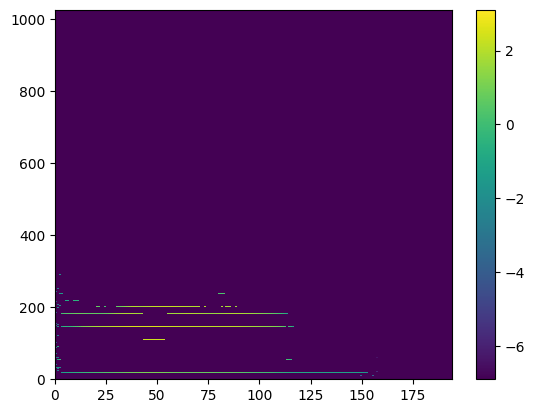

In [565]:
plt.pcolormesh(np.log(0.001+librosa.core.piptrack(y=segments[0],sr=sr,fmin=100,fmax=10000)[1]))
plt.colorbar()
